1.14.0
304


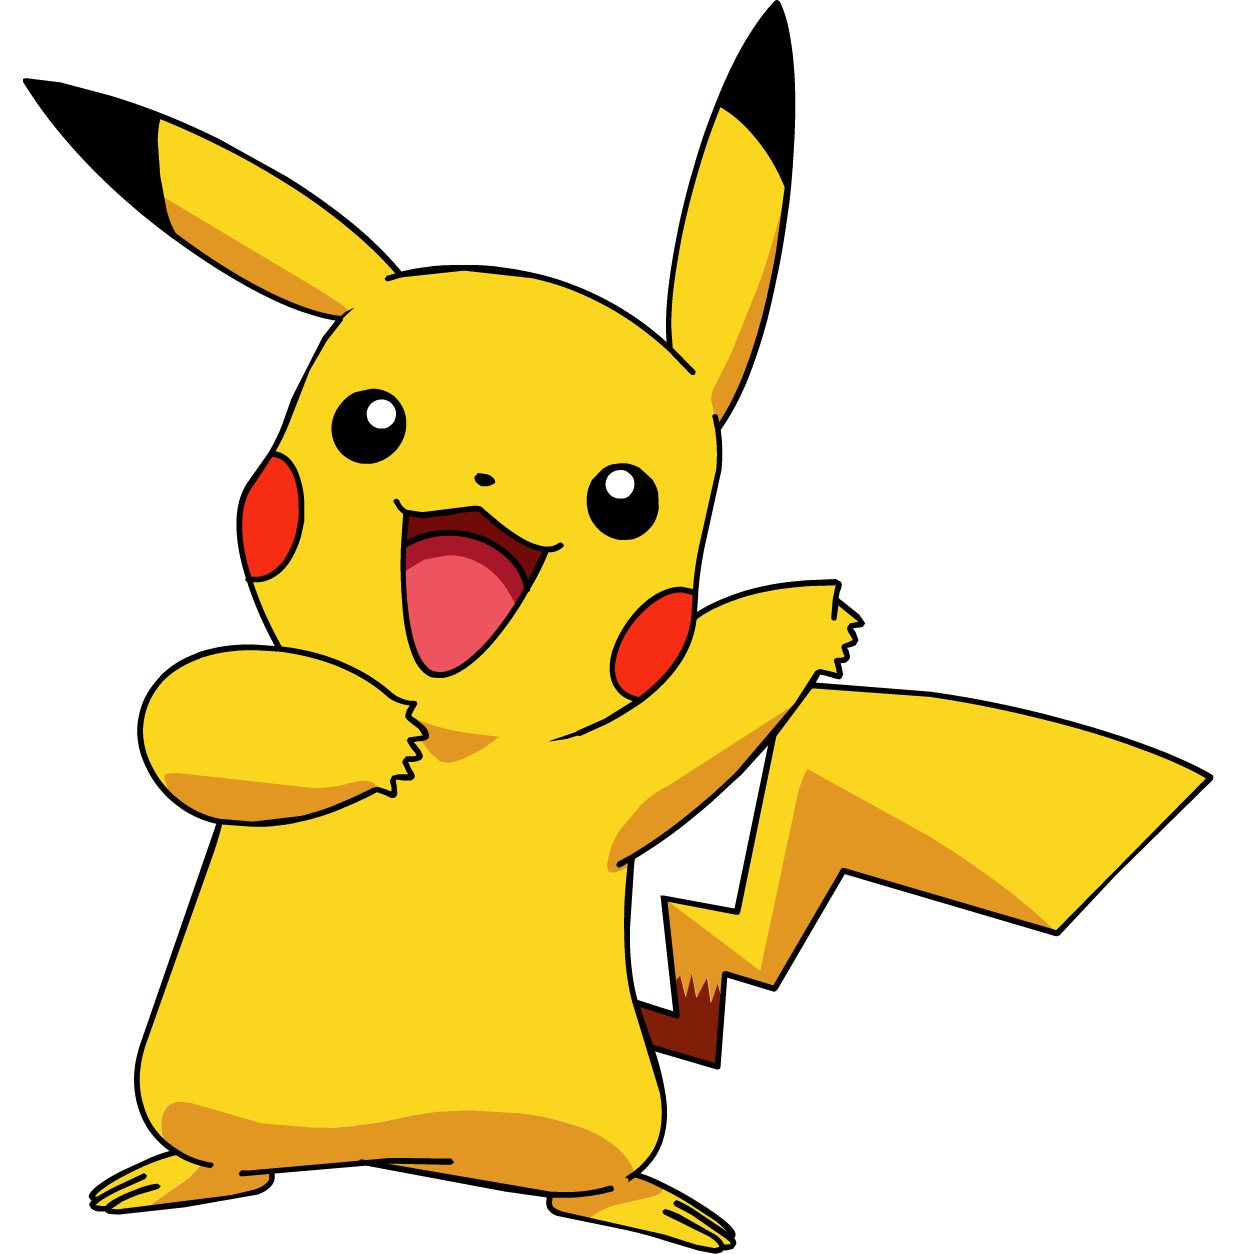

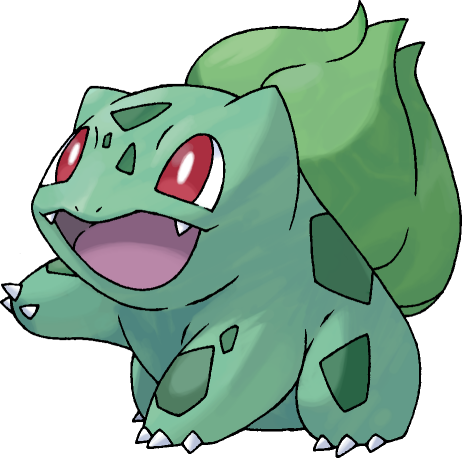

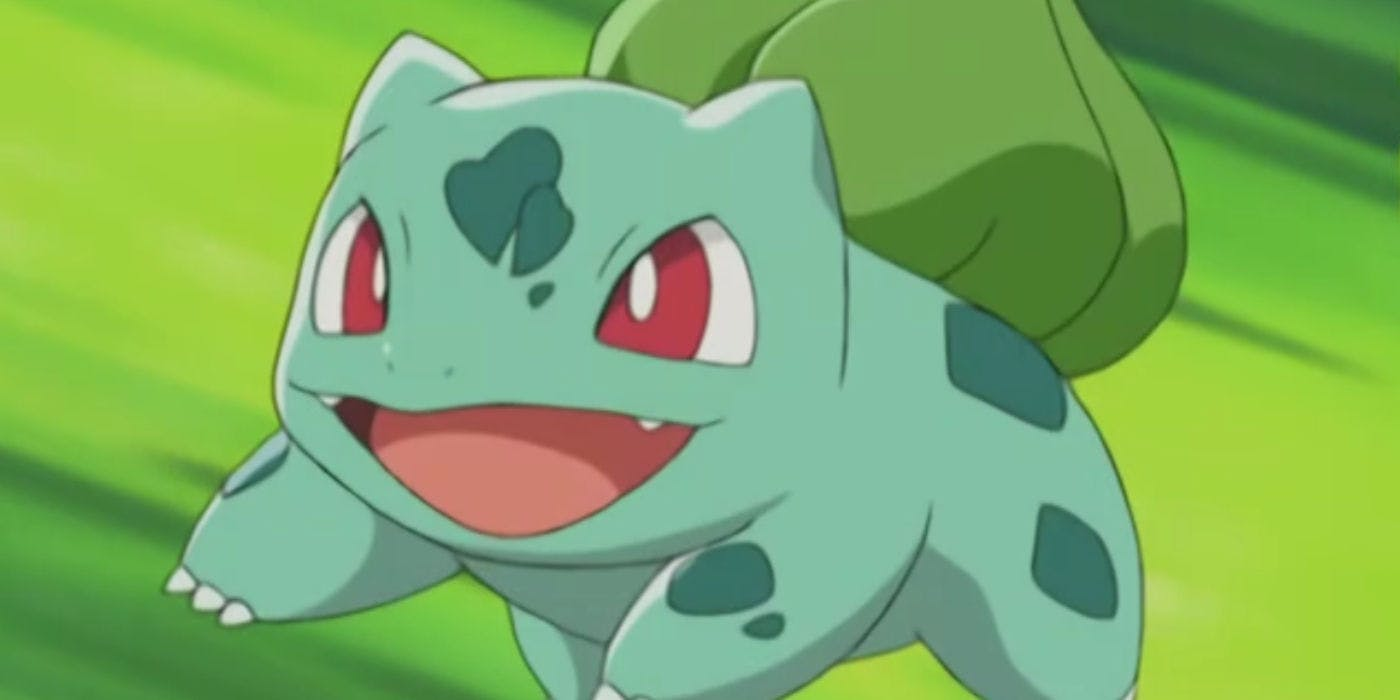

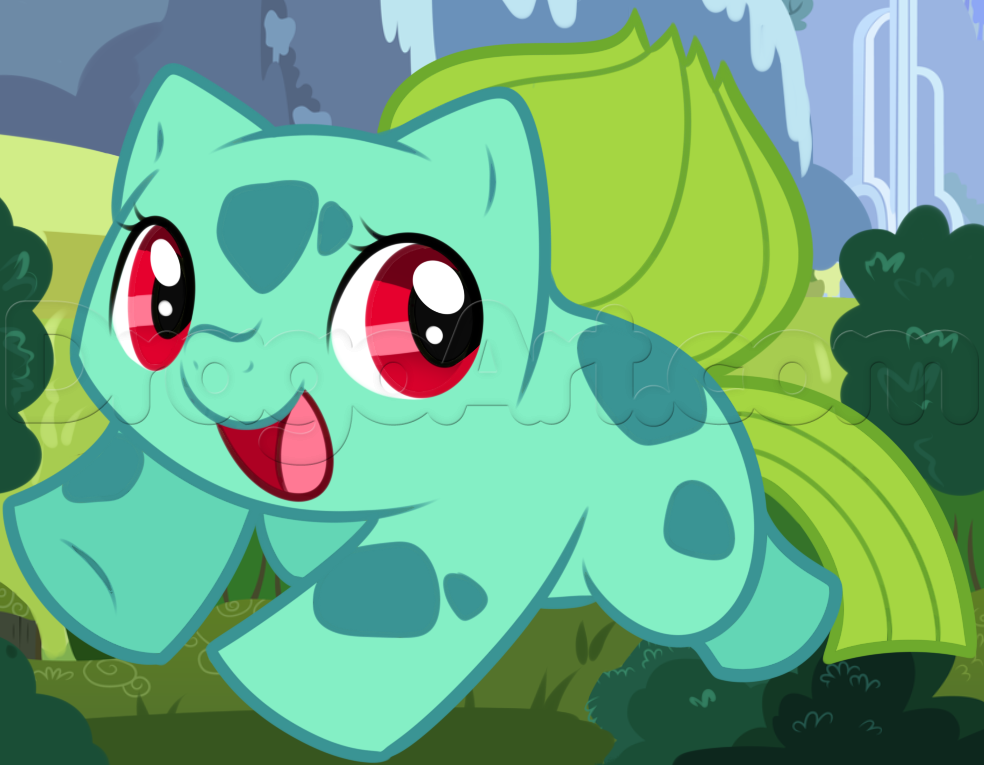

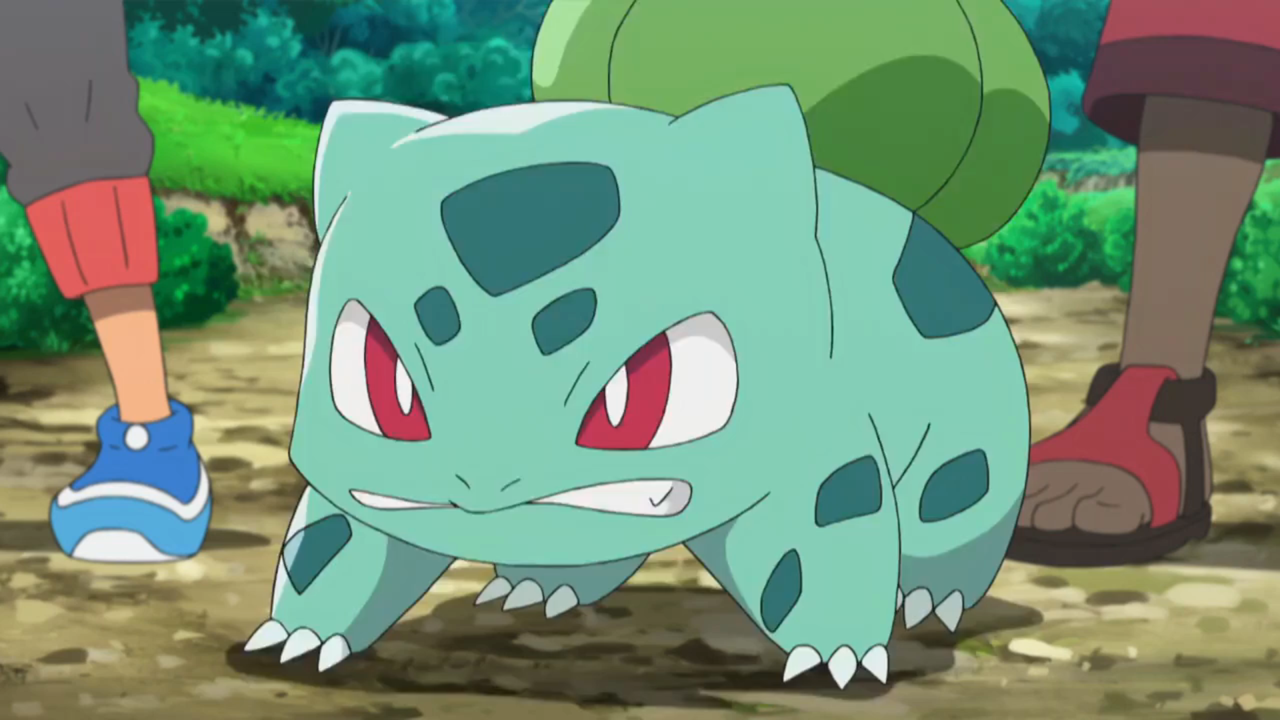

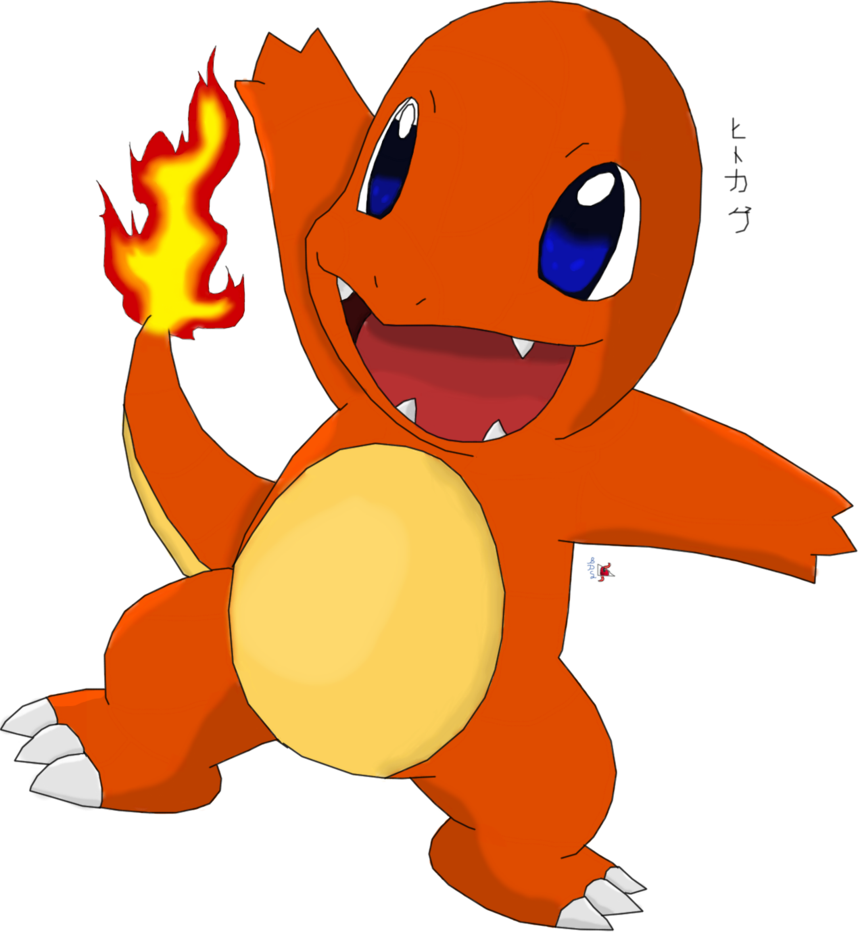

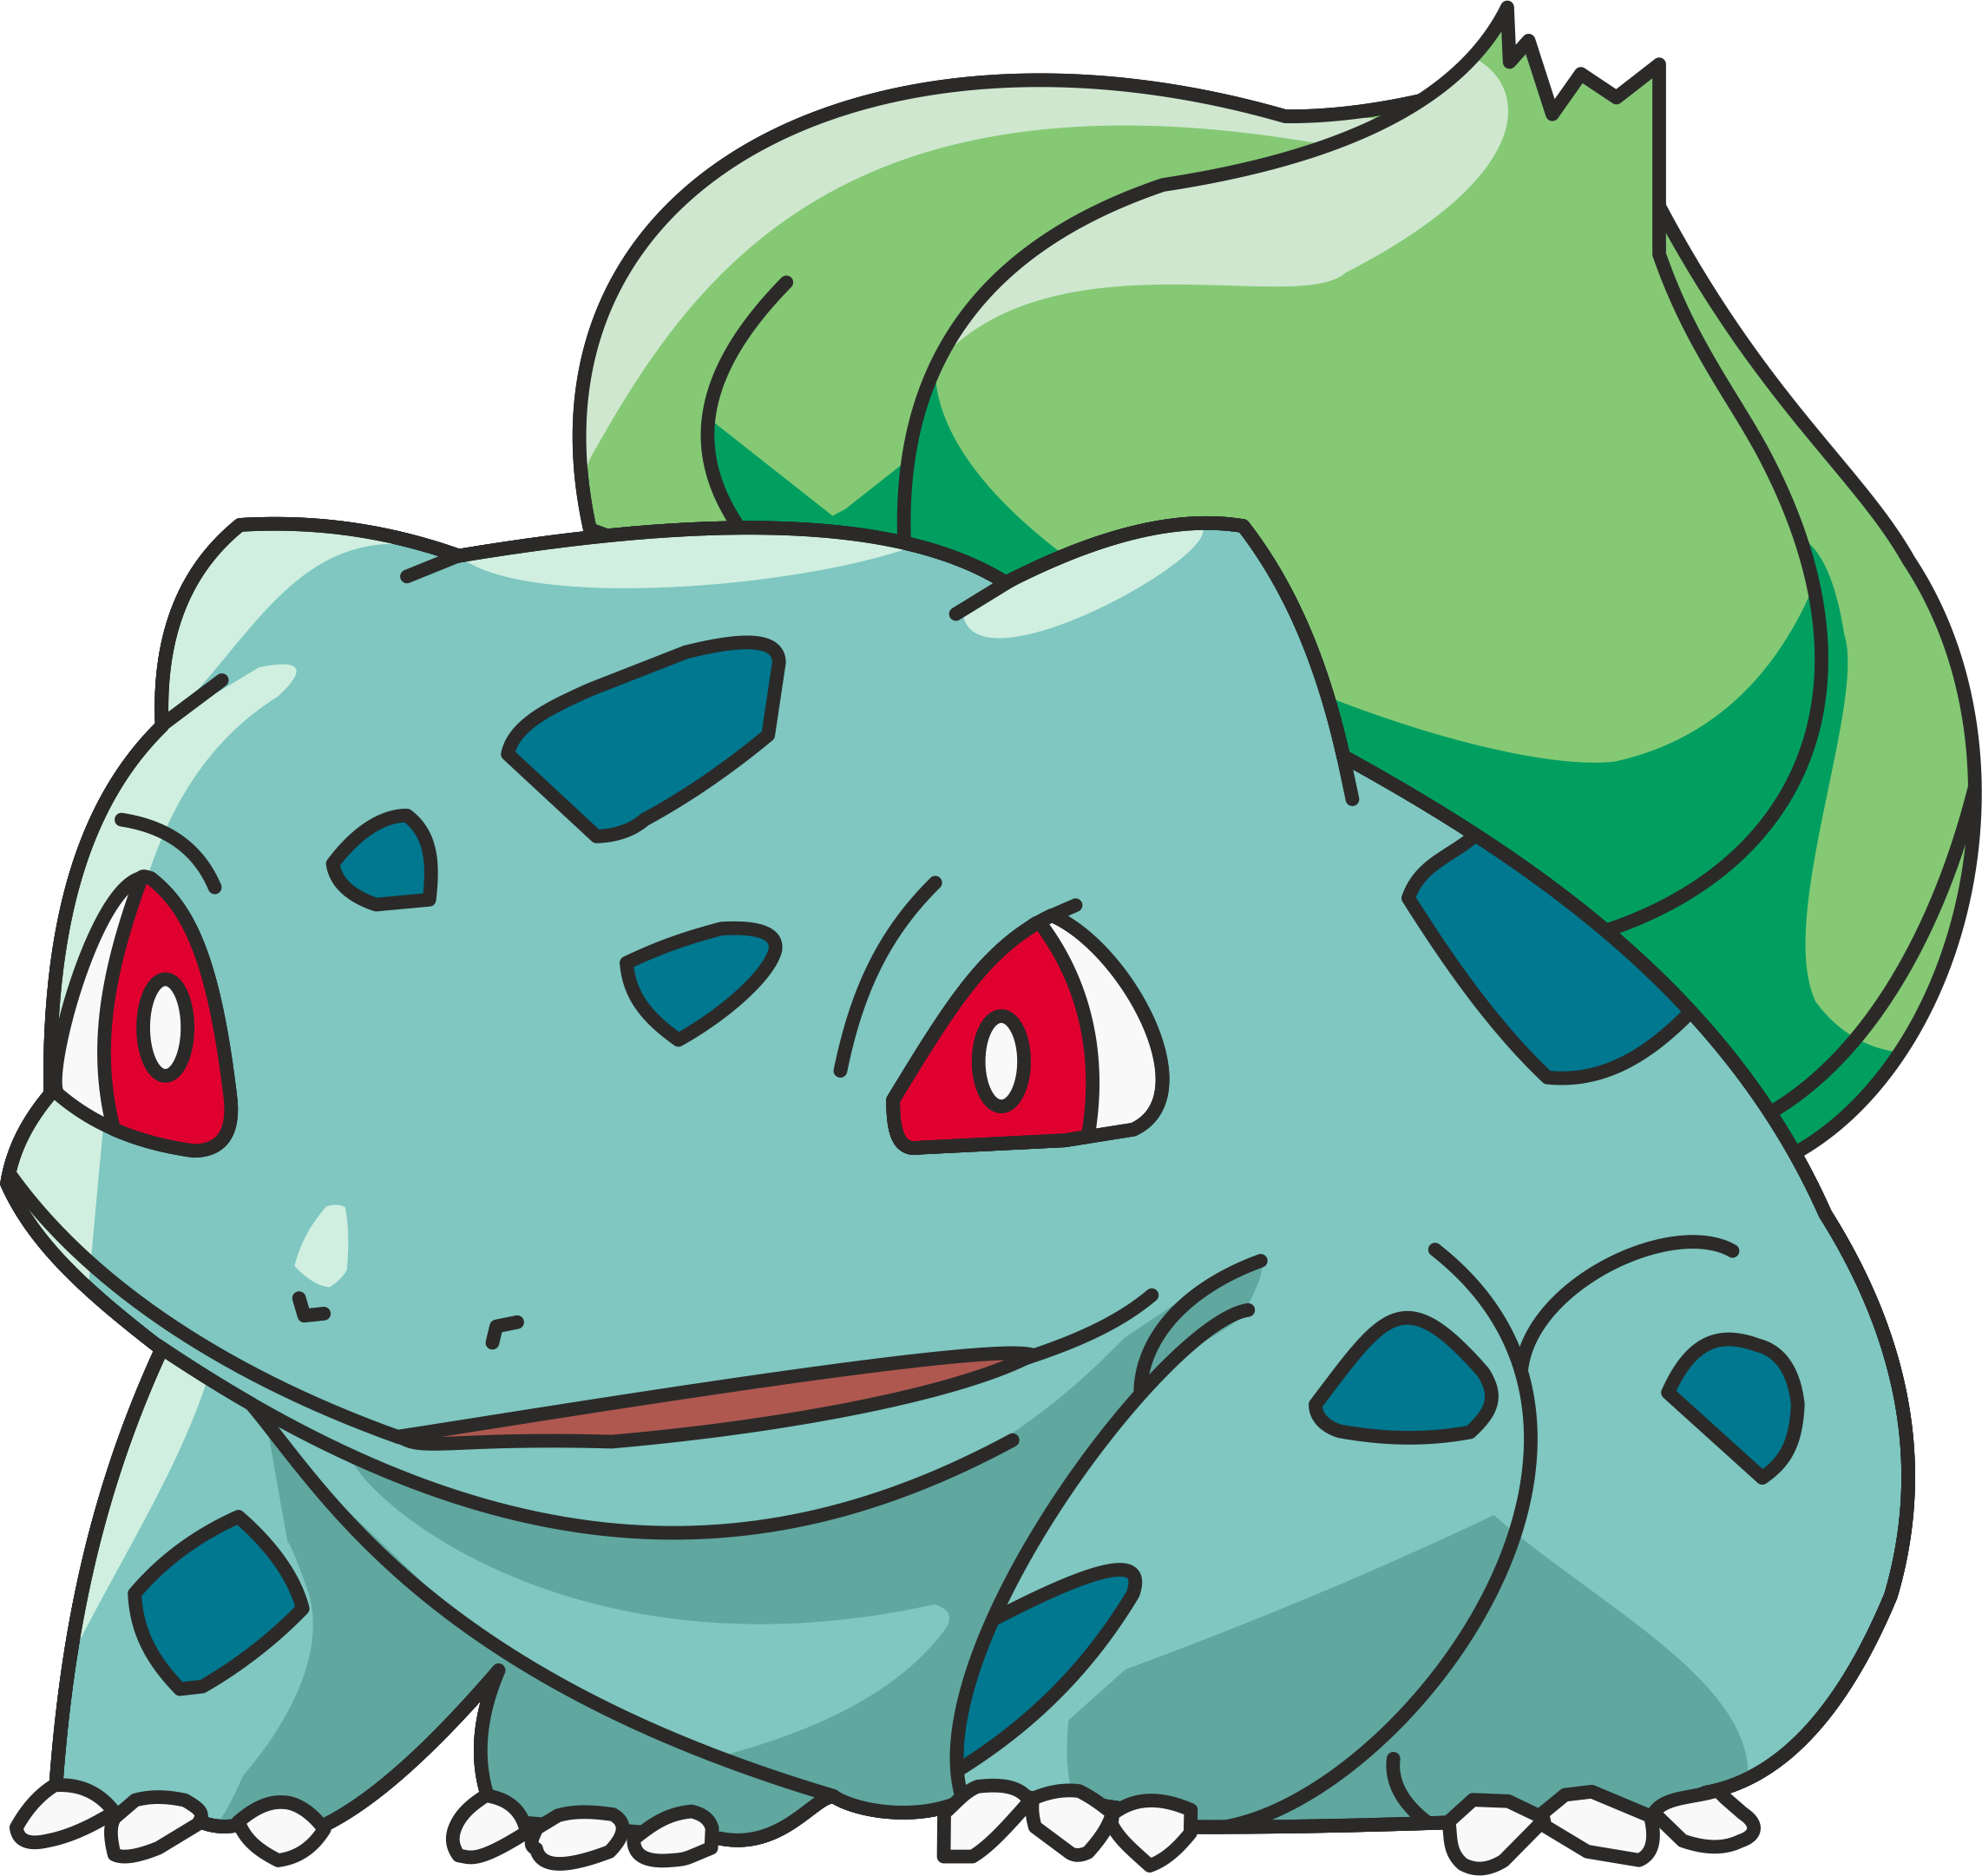

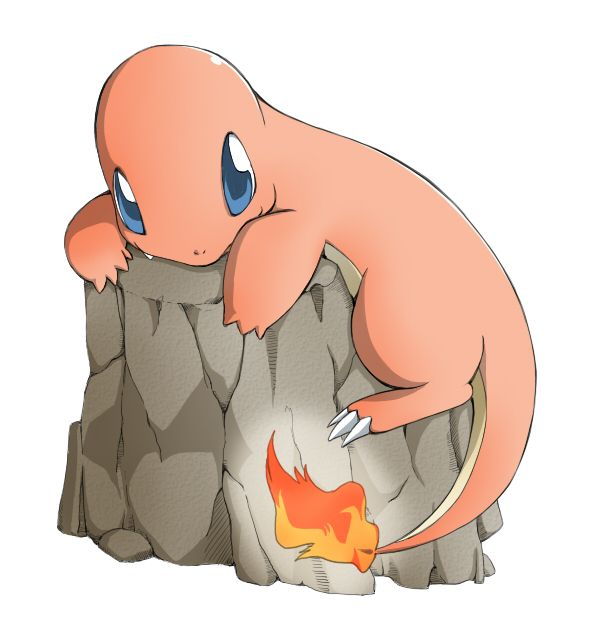

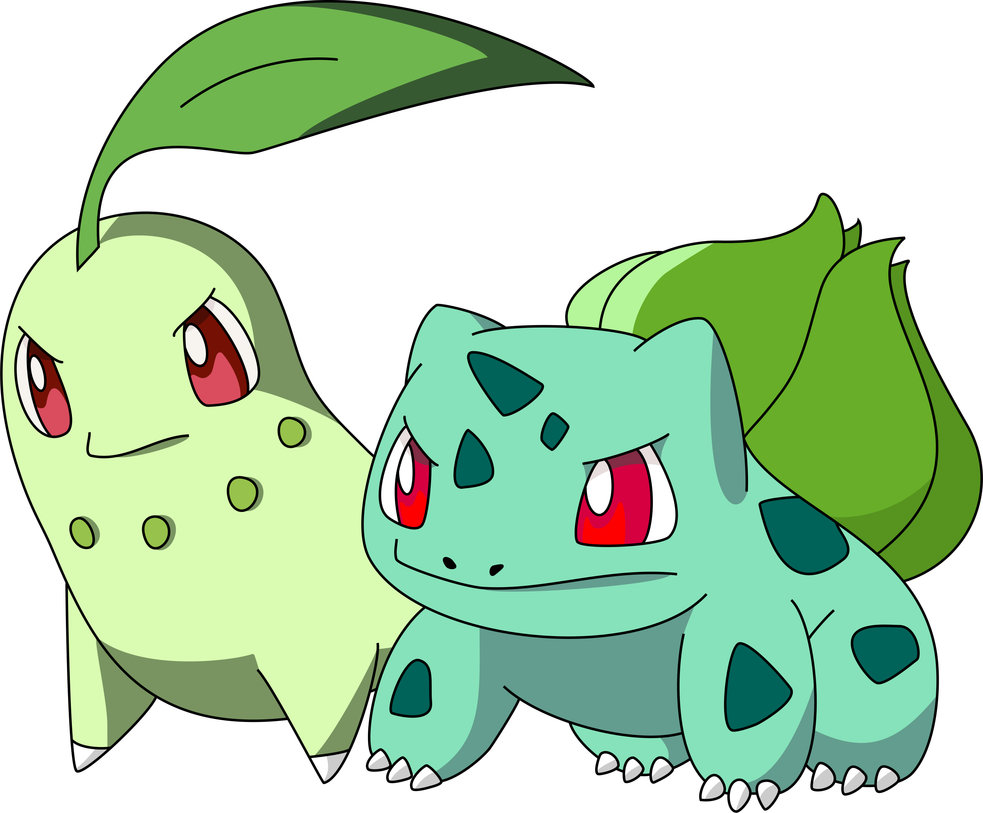

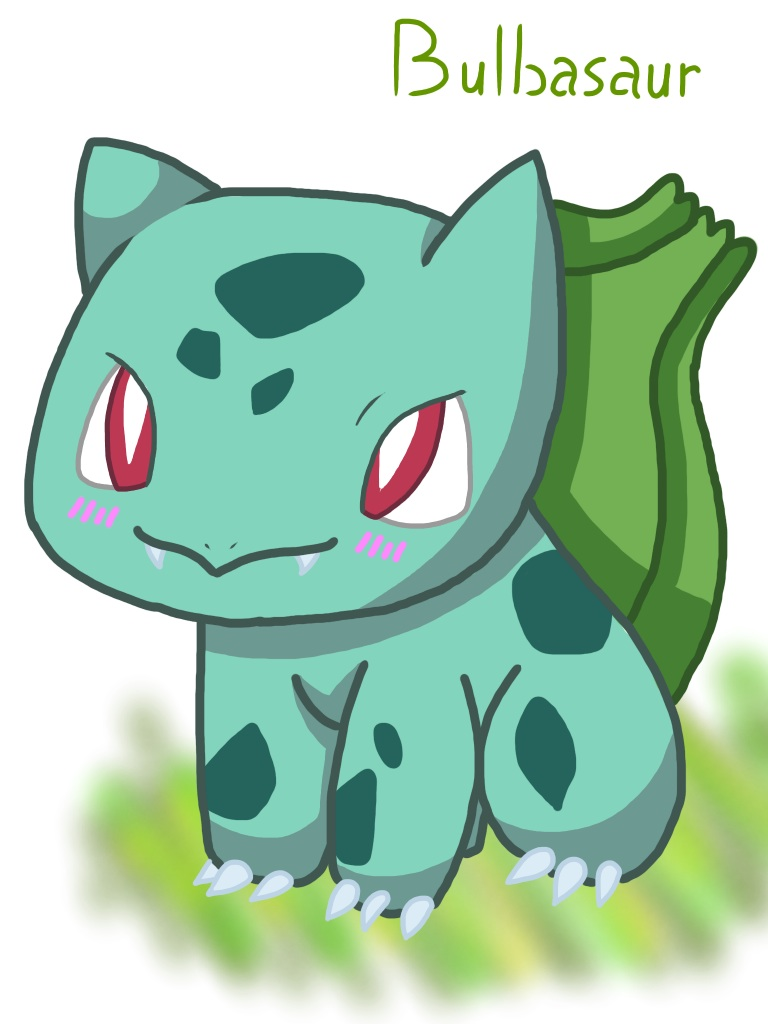

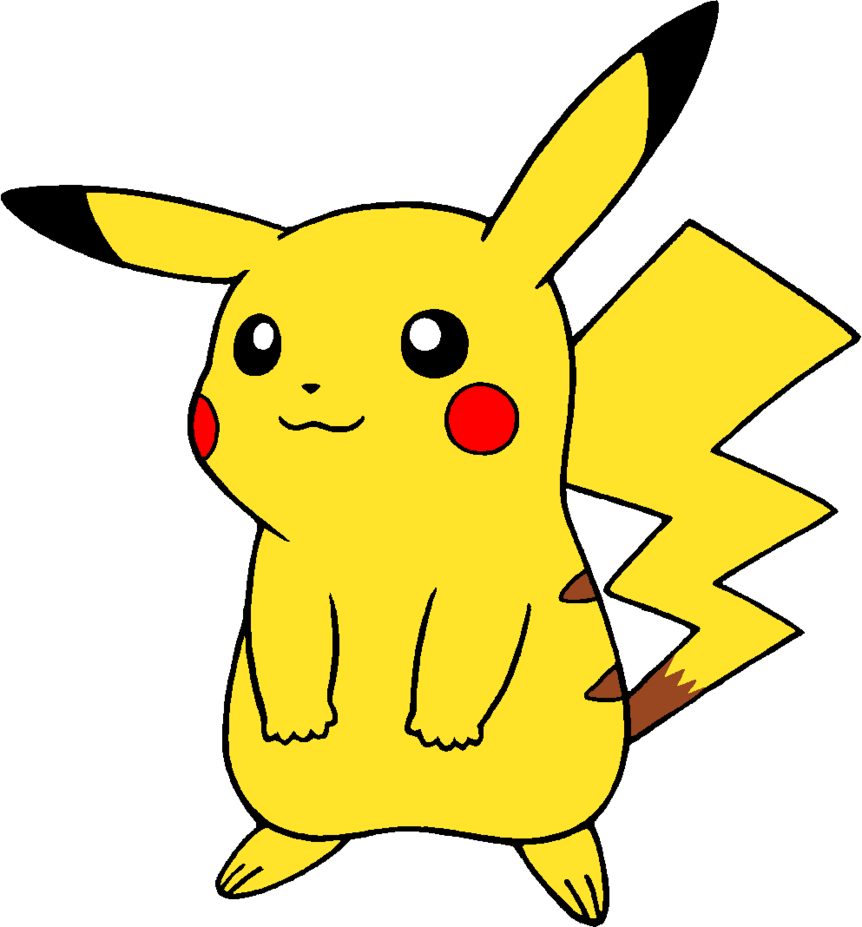

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

tf.compat.v1.enable_eager_execution()
print(tf.__version__)

import os
import random
import IPython.display as display

AUTOTUNE = tf.data.experimental.AUTOTUNE

from pathlib import Path
p = Path("./")
dirs = p.glob("*")
for folder in dirs:
    if (str(folder)=='Images'):
        all_image_paths = [str(img) for img in folder.glob("*.jpg")]

print(len(all_image_paths))
#data_root_orig = tf.keras.utils.get_file()

a = display.Image(all_image_paths[1])
display.display(a)

for n in range(10):
    img_path = random.choice(all_image_paths)
    display.display(display.Image(img_path))
    print()

In [3]:
import pandas as pd
df = pd.read_csv('train.csv')
val = df[['NameOfPokemon']].values
labels_dic = {"Pikachu": 0, "Bulbasaur": 1, "Charmander": 2}
labely = []
for i in val:
    labely.append(labels_dic[i[0]])
print(labely)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


304



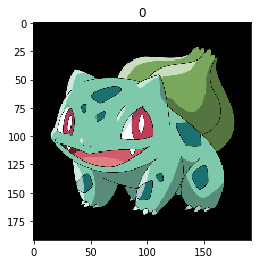

In [22]:

def preprocess_image(image):
    image = tf.image.decode_jpeg(image,channels=3)
    image = tf.image.resize(image,[192,192])
    image = image.numpy()
    image = image/255.0
    return image
def load_and_preprocess(path):
    image = tf.read_file(path)
    return preprocess_image(image)

import matplotlib.pyplot as plt

X = [load_and_preprocess(i) for i in all_image_paths]
print(len(X))

#img_1 = all_image_paths[100]
#label = labely[100]
plt.imshow(X[101])
#print(type(load_and_preprocess(img_1)))
plt.grid(False)
plt.title(label)
print()

In [24]:
#path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
#print('shape: ', repr(path_ds.output_shapes))
#print('type: ', path_ds.output_types)
#print()
#print(path_ds)

In [33]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, labely, test_size=0.2)
print(y_test)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
X_train = X_train.reshape((len(X_train),192,192,3))
X_test = X_test.reshape((len(X_test),192,192,3))


[2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 0, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2]


In [28]:
from tensorflow.keras import datasets, layers, models
from time import time
from tensorflow.python.keras.callbacks import TensorBoard

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (192,192,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 190, 190, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 95, 95, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 93, 93, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 190, 190, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 95, 95, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 93, 93, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 123904)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                7

In [46]:
#tensorboard = TensorBoard(log_dir = "/temp/poke3/")
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#model.fit(X_train, y_train, epochs = 5, callbacks = [tensorboard])
model.fit(X_train, y_train, epochs = 5)

test_loss, test_acc = model.evaluate(X_test, y_test)

print(test_acc)

Epoch 1/5
243/243 [==============================] - 7s 28ms/sample - loss: 0.8898 - acc: 0.6008
Epoch 2/5
243/243 [==============================] - 6s 27ms/sample - loss: 0.2010 - acc: 0.9053
Epoch 3/5
243/243 [==============================] - 7s 27ms/sample - loss: 0.1129 - acc: 0.9630
Epoch 4/5
243/243 [==============================] - 6s 27ms/sample - loss: 0.1075 - acc: 0.9671
Epoch 5/5
61/61 [==============================] - 0s 8ms/sample - loss: 0.2944 - acc: 0.9344
0.93442625
